In [139]:
from gensim import models
import numpy as np
import functions as fc

In [ ]:
max_len = 40

In [2]:
# 불러들이는데 시간 오지게 걸리고, 다운 받아서 쥬피터 폴더에 넣어야함
ko_model = models.fasttext.load_facebook_model('cc.ko.300.bin')

In [93]:
from konlpy.tag import Okt # 이걸 써서 포스 태깅을 할꺼고
okt = Okt()
import pandas as pd # 이것들 가져와
train_data = pd.read_csv('train_data.csv')
test_data = pd.read_csv('test_data.csv')

In [91]:
#문장들 전처리하기
def preprocessing(data):
    data.drop_duplicates(subset=['document'], inplace=True)
    data = data.dropna(how = 'any')
    data['document'] = data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
    data['document'].replace('', np.nan, inplace=True)
    data = data.dropna(how = 'any')
    sentences = data['document'].tolist()
    label = data['label']
    print('data len = {}'.format(len(sentences)))
    return sentences, label

In [26]:
# 단어 토큰화 하기
def tokenize(sentence):
    okt = Okt()
    tokenized_sentence = []

    # 우선 단어의 기본형으로 모두 살리고, 명사, 동사, 영어만 담는다.
    # 그냥 nouns로 분리하는 것보다 좀 더 정확하고 많은 데이터를 얻을 수 있다.
    for line in sentence:
        result = []
        temp_sentence = okt.pos(line, norm=True, stem=True) # 먼저 형태소 분리해서 리스트에 담고

        for i in temp_sentence:                             
            if (i[1] == 'Noun' or i[1] == 'Adjective' or i[1] == 'Alpha'):                  
                result.append(i[0])
            
        tokenized_sentence.append(result)

    return tokenized_sentence

In [54]:
def pad_sequence(sentences, padding_word="<PAD/>"): #  오른쪽을 패딩주기
    maxlen = 40
    padded_sentences = []
    for i in range(len(sentences)):
        sentence = sentences[i]
        if len(sentence)<=maxlen:
            num_padding = maxlen - len(sentence)
            new_sentence = sentence + [padding_word] * num_padding
        else : new_sentence = sentence[:maxlen]
        padded_sentences.append(new_sentence)
    return padded_sentences

In [73]:
# ko_model.wv.word_vec('<PAD/>')
paddedarray = np.array([ ko_model.wv.word_vec(token) for x in padded for token in x])
final_array=paddedarray.reshape(-1,max_len,300) # 이런 형태네? max_length of sent = 22(34),근데 10개의 sent, 22*10 fasttext = 300(vector) 
final_array.shape

In [ ]:
def vectorize(padded_sentences):
    paddedarray = np.array([ ko_model.wv.word_vec(token) for x in padded_sentences for token in x])
    final_array=paddedarray.reshape(-1,max_len,300)

In [134]:
pre_train_data, train_label = preprocessing(train_data)
pre_test_data, test_label = preprocessing(test_data)

data len = 145791
data len = 48995


C:\Users\YOON\anaconda3\envs\nlp\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\YOON\anaconda3\envs\nlp\lib\site-packages\pandas\core\generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [103]:
token_train_data = tokenize(pre_train_data)
token_test_data = tokenize(pre_test_data)

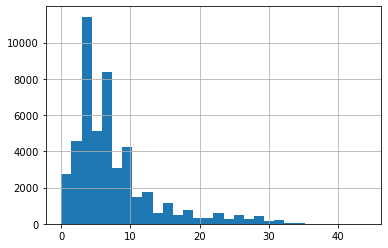

In [130]:
df['len']=[len(i) for i in df['tokens']]
import matplotlib.pyplot as plt

df['len'].hist(bins =30)

In [125]:
## 토큰화된 데이터 pickle로 저장
# import pandas as pd
# import pickle
# df = pd.DataFrame(np.array(token_test_data),columns=['tokens'])
# df['labels']=list(map(int,test_label))
# df2 = pd.DataFrame(token_test_data,test_label,columns=['tokens','lable'])
# df1.to_pickle('token_train_data.pkl')
# df2.to_pickle('token_test_data.pkl')

In [ ]:
import pickle
import pandas as pd
token_train_data = pd.read_pickle('token_train_data.pkl')
token_test_data = pd.read_pickle('token_test_data.pkl')

In [140]:
final_train_data = fc.fasttext_vectorize(token_train_data)
final_test_data = fc.fasttext_vectorize(token_test_data)


NameError: name 'np' is not defined

In [72]:
len(padded)

145791

(145791, 40, 300)

In [19]:
pading# 리스트 안에 220개 들어가있어, 22개를 하나로 합쳐줘야해, 그래서 10차원 만들어야 해 ( 10개 기준)
      # 100개로 해보니,, 34로 해야함,                  (100차원) 100개 기준

def divide_list(l, n): 
    # 리스트 l의 길이가 n이면 계속 반복
    for i in range(0, len(l), n): 
        yield l[i:i + n] 
# 한 리스트에 몇개씩 담을지 결정
n = 3
result = list(divide_list(pading, 34))


    

NameError: name 'pading' is not defined

In [60]:
import tensorflow as tf

In [61]:
from tensorflow import keras

In [76]:
embedding_dim = 200
filter_sizes = (3, 4, 5)
num_filters = 100
dropout = 0.5
hidden_dims = 100

batch_size = 50
num_epochs = 10
min_word_count = 1
context = 10

conv_blocks = []

sequence_length = 200

# input_shape = (sequence_length, embedding_dim) # input shape for
input_shape = (40, 300) # input shape for data, (max_length of sent, vect)

model_input = keras.layers.Input(shape=input_shape)
z = model_input
for sz in filter_sizes:
    conv = keras.layers.Conv1D(filters=num_filters,
                         kernel_size=sz,
                         padding="valid",
                         activation="relu",
                         strides=1)(z)
    conv = keras.layers.MaxPooling1D(pool_size=2)(conv)
    conv = keras.layers.Flatten()(conv)
    conv_blocks.append(conv)
z = keras.layers.Concatenate()(conv_blocks) if len(conv_blocks) > 1 else conv_blocks[0]

z = keras.layers.Dropout(dropout)(z)
z = keras.layers.Dense(hidden_dims, activation="relu")(z)
model_output = keras.layers.Dense(1, activation="sigmoid")(z)

model = keras.Model(model_input, model_output)
model.compile(loss="binary_crossentropy", optimizer="adadelta", metrics=["accuracy"])


In [77]:
model.summary()

Model: "functional_9"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 40, 300)]    0                                            
__________________________________________________________________________________________________
conv1d_12 (Conv1D)              (None, 38, 100)      90100       input_5[0][0]                    
__________________________________________________________________________________________________
conv1d_13 (Conv1D)              (None, 37, 100)      120100      input_5[0][0]                    
__________________________________________________________________________________________________
conv1d_14 (Conv1D)              (None, 36, 100)      150100      input_5[0][0]                    
_______________________________________________________________________________________

In [78]:
model.fit(final_array, label,epochs =10, batch_size = batch_size)

Epoch 1/10
2916/2916 [==============================] - 54s 19ms/step - loss: 0.6924 - accuracy: 0.5176
Epoch 2/10
2916/2916 [==============================] - 52s 18ms/step - loss: 0.6898 - accuracy: 0.5424
Epoch 3/10
2916/2916 [==============================] - 53s 18ms/step - loss: 0.6877 - accuracy: 0.5597
Epoch 4/10
2916/2916 [==============================] - 53s 18ms/step - loss: 0.6850 - accuracy: 0.5773
Epoch 5/10
2916/2916 [==============================] - 53s 18ms/step - loss: 0.6817 - accuracy: 0.5939
Epoch 6/10
2916/2916 [==============================] - 54s 18ms/step - loss: 0.6777 - accuracy: 0.6092
Epoch 7/10
2916/2916 [==============================] - 54s 19ms/step - loss: 0.6727 - accuracy: 0.6255
Epoch 8/10
2916/2916 [==============================] - 53s 18ms/step - loss: 0.6669 - accuracy: 0.6381
Epoch 9/10
2916/2916 [==============================] - 53s 18ms/step - loss: 0.6600 - accuracy: 0.6496
Epoch 10/10
2916/2916 [==============================] - 53s 18m

In [80]:
import os
checkpoint_dir = './ckpt'
if not os.path.exists(checkpoint_dir):
    os.makedirs(checkpoint_dir)

In [83]:
callbacks = [
    # This callback saves a SavedModel every 100 batches.
    # We include the training loss in the folder name.
    keras.callbacks.ModelCheckpoint(
        filepath=checkpoint_dir + '/ckpt-loss={loss:.3f}',
        save_freq=500)
]
model.fit(final_array, label, epochs=1, callbacks=callbacks, batch_size = batch_size, validation_data=(test_data, test_label)

2916/2916 [==============================] - 56s 19ms/step - loss: 0.6301 - accuracy: 0.6817
